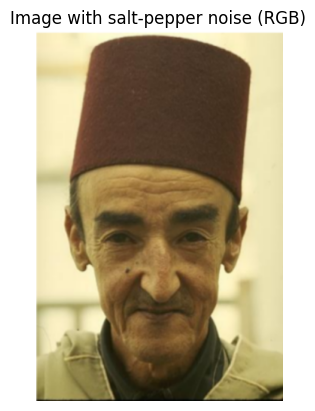

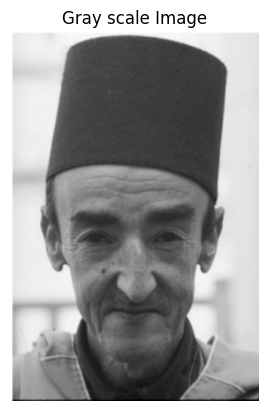

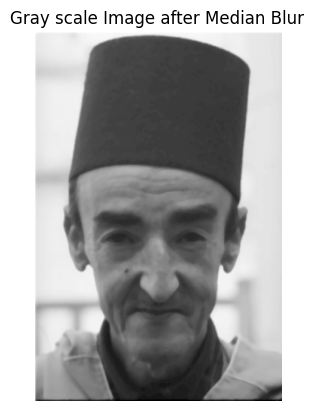

In [143]:
import cv2
import matplotlib.pyplot as plt

BGR_image = cv2.imread("/content/cv_assignment.png")
RGB_image = cv2.cvtColor(BGR_image, cv2.COLOR_BGR2RGB)
gray_scale_img = cv2.imread("/content/cv_assignment.png", 0)

plt.figure()
plt.imshow(RGB_image)
plt.title("Image with salt-pepper noise (RGB)")
plt.axis("OFF")

mb = cv2.medianBlur(gray_scale_img, ksize=5)

plt.figure()
plt.imshow(gray_scale_img, cmap='gray')
plt.title("Gray scale Image")
plt.axis("OFF")

plt.figure()
plt.imshow(mb, cmap='gray')
plt.title("Gray scale Image after Median Blur")
plt.axis("OFF")
plt.show()


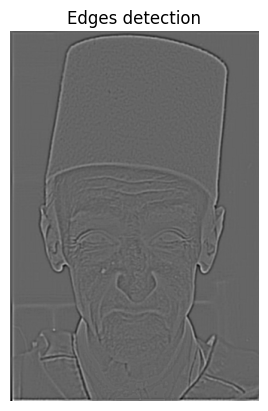

In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filtered_image = cv2.Laplacian(gray_scale_img, cv2.CV_64F, ksize=5)

plt.figure()
plt.imshow(filtered_image, cmap='gray')
plt.title("Edges detection")
plt.axis("OFF")
plt.show()


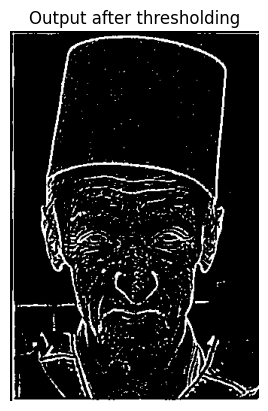

In [149]:
abs_filtered_image = filtered_image
for i in range(len(abs_filtered_image)):
  for j in range(len(abs_filtered_image[0])):
      if(abs_filtered_image[i][j] <= 200):
        abs_filtered_image[i][j] = 0
      else:
        abs_filtered_image[i][j] = 255


plt.figure()
plt.imshow(abs_filtered_image, cmap='gray')
plt.title("Output after thresholding")
plt.axis("OFF")
plt.show()

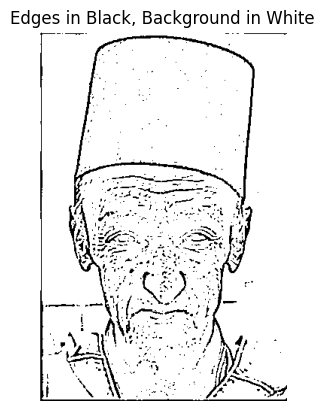

In [150]:
inverted_image = abs_filtered_image.copy()
for i in range(len(inverted_image)):
  for j in range(len(inverted_image[0])):
      if(inverted_image[i][j] == 255):
        inverted_image[i][j] = 0
      else:
        inverted_image[i][j] = 255


plt.figure()
plt.imshow(inverted_image, cmap='gray')
plt.title("Edges in Black, Background in White")
plt.axis("OFF")
plt.show()

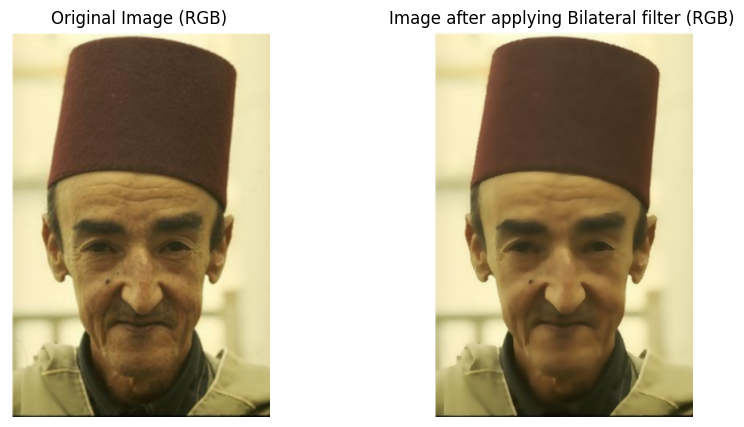

In [151]:
# Apply bilateral filter
bilateral = RGB_image.copy()
d = 5
sigma_color = 25
sigma_space = 25
for i in range(4):
  bilateral = cv2.bilateralFilter(bilateral, d, sigma_color, sigma_space)

# Plot original and bilateral-filtered images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_image)
plt.title("Original Image (RGB)")
plt.axis("OFF")

# Bilateral filtered image
plt.subplot(1, 2, 2)
plt.imshow(bilateral)
plt.title("Image after applying Bilateral filter (RGB)")
plt.axis("OFF")

plt.show()

In [152]:
result_image = bilateral.copy()
for i in range(inverted_image.shape[0]):
    for j in range(inverted_image.shape[1]):
        if inverted_image[i][j] == 0:  # If it's an edge (black in inverted image)
            result_image[i][j] = [0, 0, 0]  # Set the pixel to black
        else:
            result_image[i][j] = bilateral[i][j]  # Keep the bilateral filtered color

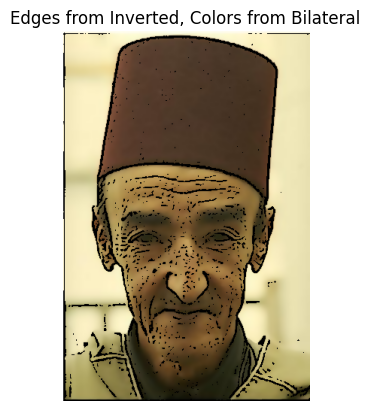

In [153]:
plt.figure()
plt.imshow(result_image)
plt.title("Edges from Inverted, Colors from Bilateral")
plt.axis("OFF")

plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming gray_scale_img is the input grayscale image
# Apply Laplacian to detect edges
filtered_image = cv2.Laplacian(gray_scale_img, cv2.CV_64F, ksize=5)

# Convert back to 8-bit to display it properly
abs_filtered_image = cv2.convertScaleAbs(filtered_image)
for i in range(len(abs_filtered_image)):
  for j in range(len(abs_filtered_image[0])):
      if(abs_filtered_image[i][j] <= 254):
        abs_filtered_image[i][j] = 0
      else:
        abs_filtered_image[i][j] = 255
# Plot the resulting image
plt.figure()
plt.imshow(abs_filtered_image, cmap='gray')
plt.title("Edges in White, Background in Black")
plt.axis("OFF")
plt.show()
